In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path 
import os
import sys
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres@localhost:5432/david')
import libpysal as lps
from esda import smoothing as sm
import numpy as np
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import seaborn as sns
from libpysal.weights.distance import get_points_array
from scipy.spatial import cKDTree
sys.path.append('/Users/david/Dropbox/PhD/Scripts/Spatial analyses')
import pyspace
import pickle
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
df_participation = pd.read_csv('../Data/Processed data/20221004_GIRACS_all.csv')

In [3]:
geometry = [Point(xy) for xy in zip(df_participation.e, df_participation.n)]
crs = 'epsg:2056'
gdf_participation = gpd.GeoDataFrame(df_participation, crs=crs, geometry=geometry)

In [4]:
lake = gpd.read_file('/Users/david/Dropbox/PhD/GitHub/COVID19/Data/Mapping/lake.geojson')
cantons = gpd.read_file(
    '/Users/david/Dropbox/PhD/Data/Databases/SITG/SHAPEFILE_LV95_LN02/swissBOUNDARIES3D_1_3_TLM_KANTONSGEBIET.shp')
communes = gpd.read_file(
    '/Users/david/Dropbox/PhD/Data/Databases/SITG/SHAPEFILE_LV95_LN02/swissBOUNDARIES3D_1_3_TLM_HOHEITSGEBIET.shp')
communes = communes[communes.KANTONSNUM == 25]

In [5]:
gdf_participation.groupeage.unique()

array(['50-54', '55-59', '60-64', '65-69', '70-74'], dtype=object)

In [6]:
gdf_participation[(gdf_participation.year_invit <2021)&(gdf_participation.groupeage.isin(['50-54', '55-59', '60-64', '65-69', '70-74']))].numerodossier.nunique()

133510

## Spatial analyses

In [7]:
from esda.join_counts import Join_Counts

In [8]:
df_participation = df_participation.rename(columns = {'E':'e','N':'n'})

In [9]:
geometry = [Point(xy) for xy in zip(df_participation['e'], df_participation['n'])]
# Coordinate reference system : WGS84
crs = 'epsg:2056'
df_participation = gpd.GeoDataFrame(df_participation, crs=crs, geometry=geometry)

In [10]:
mydir = Path(os.getcwd())
result_folder = mydir / '../Results' #Set data folder


In [11]:
localautocorr_spatial_result_folder = result_folder/'Local Autocorrelation'
if not os.path.exists(localautocorr_spatial_result_folder):
    os.makedirs(localautocorr_spatial_result_folder)

In [12]:
from importlib import reload
reload(pyspace)

<module 'pyspace' from '/Users/david/Dropbox/PhD/Scripts/Spatial analyses/pyspace.py'>

In [13]:
df_participation['biannual_year'] = 0

In [14]:
df_participation.loc[df_participation.year_invit.isin([1999,2000]), 'biannual_year'] = 2000
df_participation.loc[df_participation.year_invit.isin([2001,2002]), 'biannual_year'] = 2002
df_participation.loc[df_participation.year_invit.isin([2003,2004]), 'biannual_year'] = 2004
df_participation.loc[df_participation.year_invit.isin([2005,2006]), 'biannual_year'] = 2006
df_participation.loc[df_participation.year_invit.isin([2007,2008]), 'biannual_year'] = 2008
df_participation.loc[df_participation.year_invit.isin([2009,2010]), 'biannual_year'] = 2010
df_participation.loc[df_participation.year_invit.isin([2011,2012]), 'biannual_year'] = 2012
df_participation.loc[df_participation.year_invit.isin([2013,2014]), 'biannual_year'] = 2014
df_participation.loc[df_participation.year_invit.isin([2015,2016]), 'biannual_year'] = 2016
df_participation.loc[df_participation.year_invit.isin([2017,2018]), 'biannual_year'] = 2018
df_participation.loc[df_participation.year_invit.isin([2019,2020]), 'biannual_year'] = 2020

In [15]:
df_participation.biannual_year.unique()

array([2016, 2018, 2020, 2014, 2012, 2010, 2008, 2006, 2004, 2000, 2002])

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2000.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set t

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2002.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set t

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2004.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set t

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2006.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2008.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set t

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2010.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2012.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2014.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2016.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2018.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set t

../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_2020.feather


/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 5 disconnected components.

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning:

Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set t

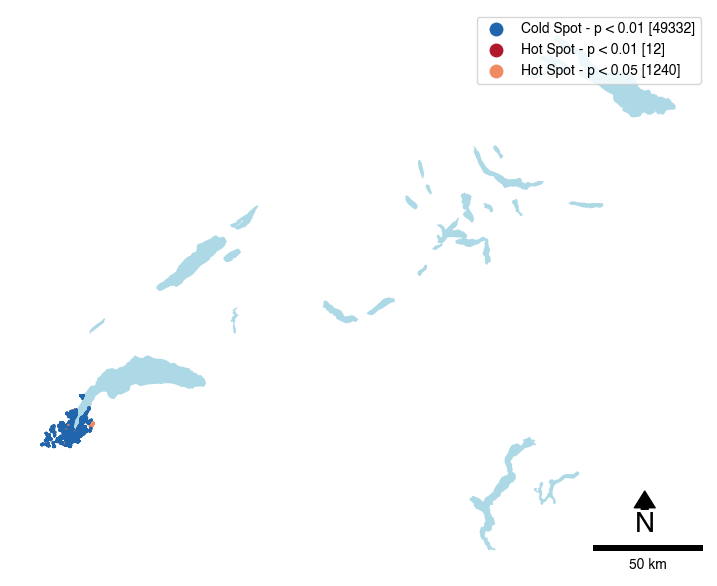

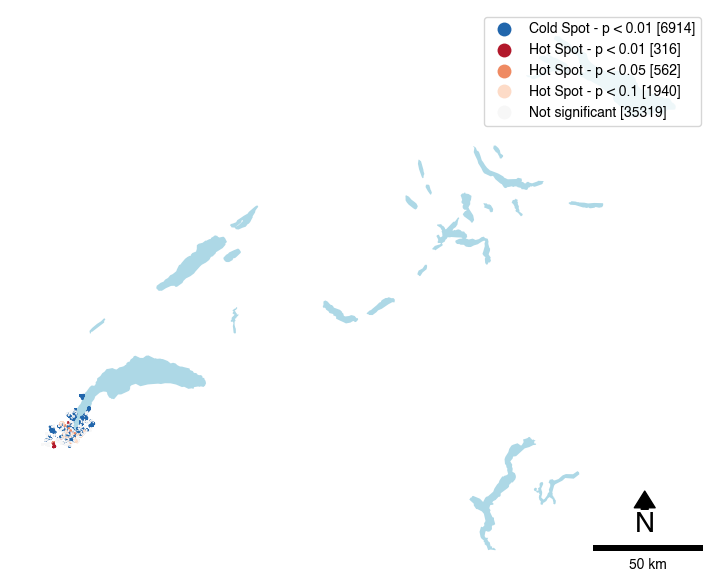

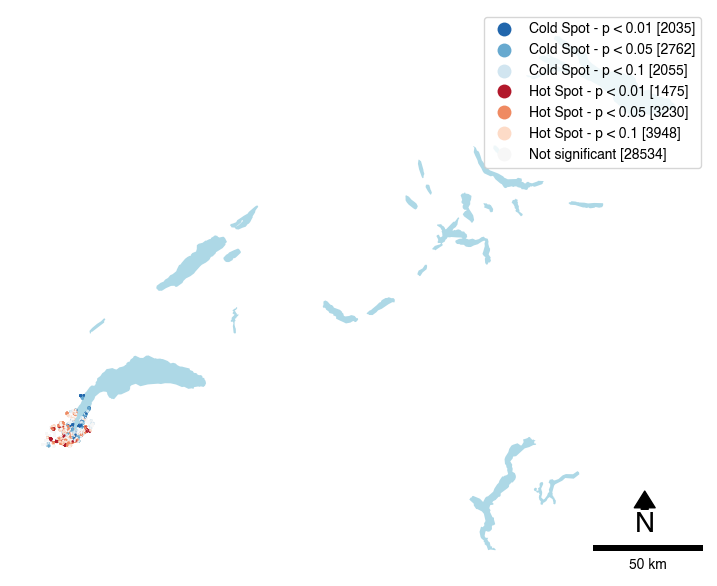

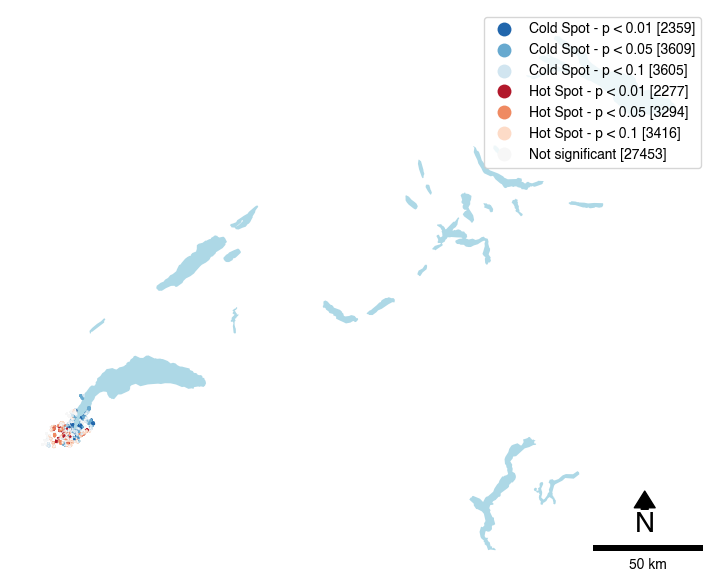

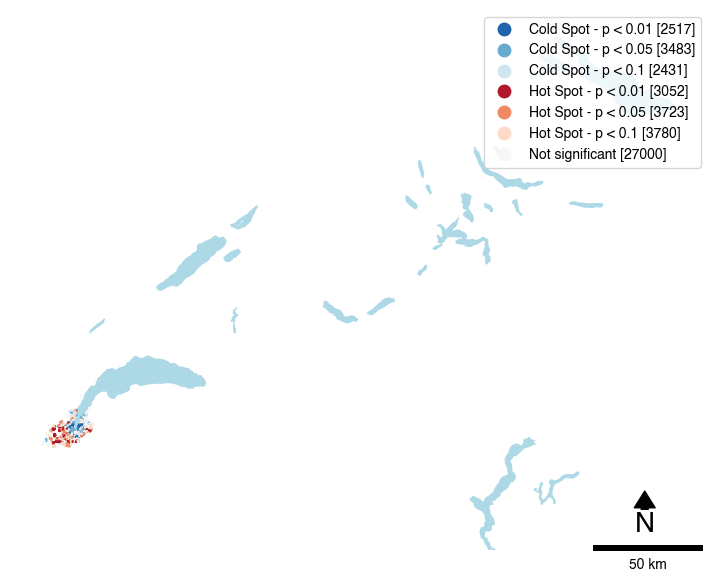

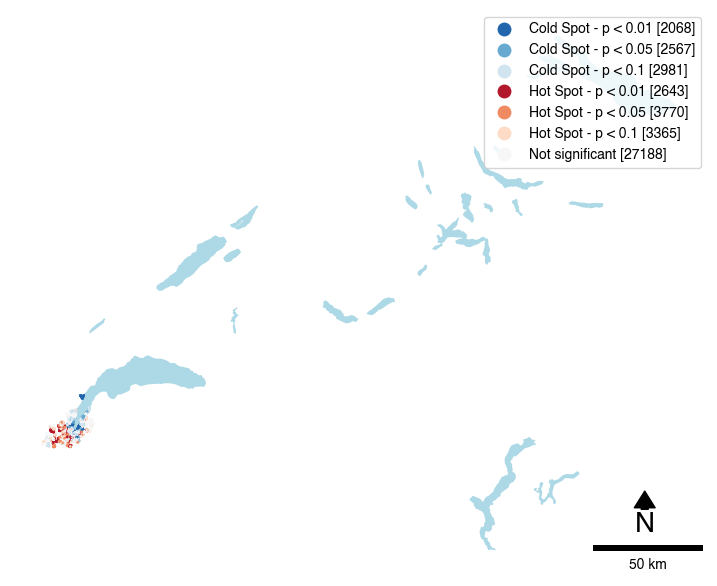

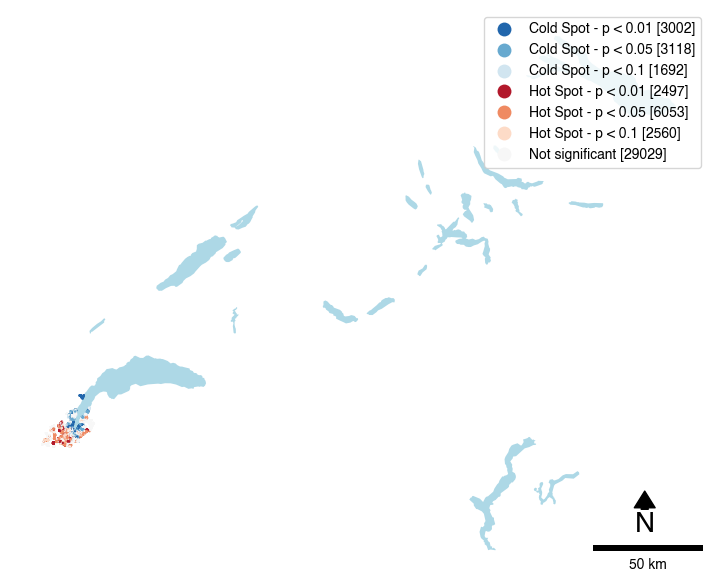

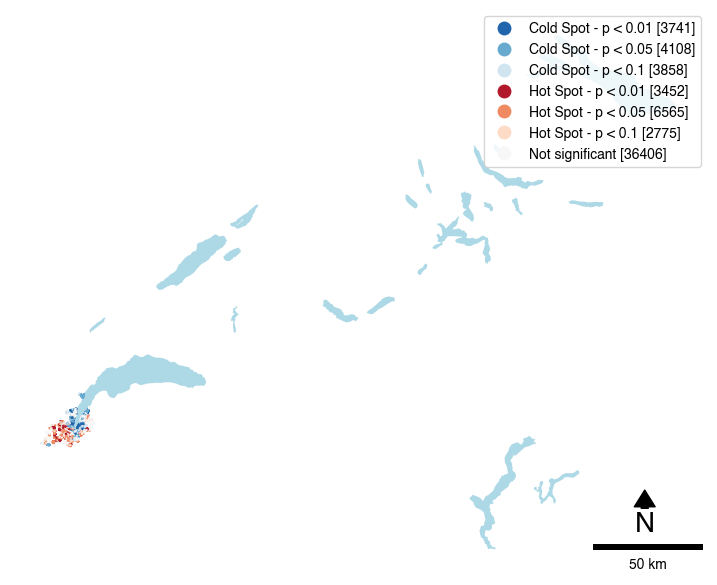

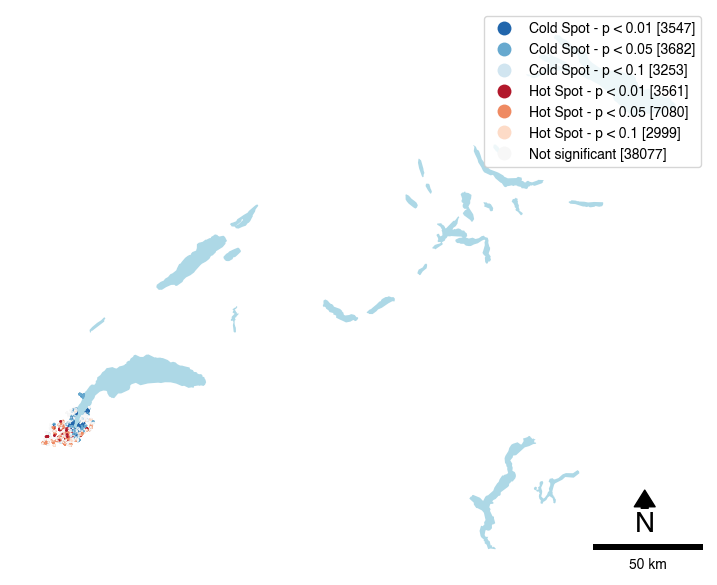

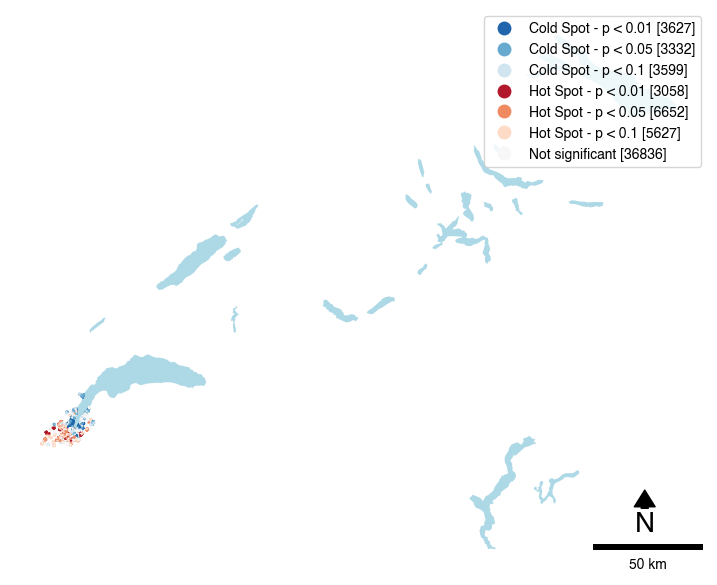

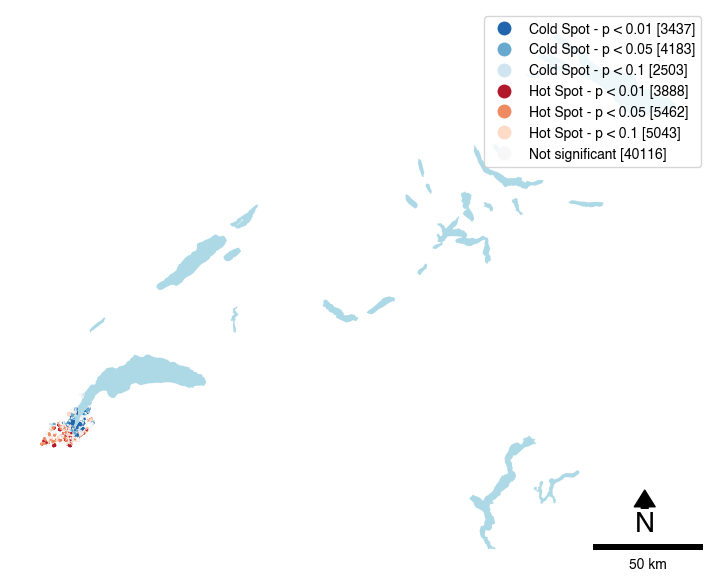

In [17]:
from pointpats import PointPattern, PoissonPointProcess
dfs_getis = []
weights = []
for year in df_participation.biannual_year.sort_values().unique():
    _df = df_participation[df_participation.biannual_year == year]
    filename = '../Data/Processed data/Yearly datasets/GIRACS_participation_biannual_'+str(year)+'.feather'
    print(filename)
    wnn100 = lps.weights.KNN(cKDTree(get_points_array(_df.geometry)),100)
#     _df, wq300_giracs = pyspace.get_distanceBandW(_df, 300, transform = 'b')
    _df['mammo_lag'] = lps.weights.lag_spatial(wnn100, _df['mammo'])
    _df['mammo'] = _df['mammo'].astype(float)
    _getis = pyspace.compute_getis(_df,'mammo',wnn100,9999)
    _df.to_feather(filename)
    dfs_getis.append(_df)
    fig, ax = pyspace.plotGetisMap(_df,'mammo_G_cl', p_001 = True)
    filename = 'Getis Ord Gi* - KNN100 - Biannual - {}.png'.format(year)
    plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 300, bbox_inches = 'tight')

In [18]:
# df_ha_year = df_ha[df_ha[invit_year] > 0][['RELI',invit_year,mammo_year,'geometry']]

In [19]:
# dfs_getis = []
# weights = []
# for year in range(1999,2021,1):
#     filename = '../Data/Processed data/Yearly datasets/GIRACS_participation_'+str(year)+'.geojson'
#     _df = gpd.read_file(filename, driver = 'GeoJSON')
#     _df, wq300_giracs = pyspace.get_distanceBandW(_df,300)
#     pickle.dump(wq600_giracs, open('../Data/Processed data/weights600'+str(year)+'_.pkl', 'wb'))
#     dfs_getis.append(_df)

In [20]:
# jc_results = []
# for year in range(1999,2021,1):
#     filename = '../Data/Processed data/Yearly datasets/GIRACS_participation_'+str(year)+'.geojson'
#     _df = gpd.read_file(filename, driver = 'GeoJSON')
#     wq600_giracs = pyspace.get_distanceBandW(_df,600)[1]
#     jc = Join_Counts(_df['mammo'], wq600_giracs,permutations = 999)
#     jc_results.append(jc)

In [21]:
# localautocorr_spatial_result_folder = result_folder/'Local Autocorrelation'
# if not os.path.exists(localautocorr_spatial_result_folder):
#     os.makedirs(localautocorr_spatial_result_folder)

In [22]:
# year = 1999
# for df in dfs_getis:
#     fig, ax = pyspace.plotGetisMap(df,'mammo_G_cl',p_001 = False)
#     filename = 'Getis Ord Gi* - KNN100 - {}.jpg'.format(year)
#     ax.set_title(year)
#     ax.set_facecolor = 'white'
#     plt.savefig(localautocorr_spatial_result_folder/'Getis_KNN100'/filename, dpi = 160, bbox_inches = 'tight')
#     year +=1

In [23]:
# dfs_getis

## Longitudinal assessment

In [24]:
df_gee = pd.DataFrame()
time = 0
for df in dfs_getis:
#     wnn100 = lps.weights.KNN(cKDTree(get_points_array(df.geometry)),100)
#     df['mammo_lag'] = lps.weights.lag_spatial(wnn100, df['mammo'])
    df['time'] = time
    df.loc[df.mammo_lag < df['mammo_lag'].median(), 'status'] = 'Non-conducive environment'
    df.loc[df.mammo_lag >= df['mammo_lag'].median(), 'status'] = 'Conducive environment'
    time+=1
    
    df_gee = pd.concat([df_gee, df])

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [25]:
df_gee = df_gee.sort_values('numerodossier')

In [26]:
women_5invitations = df_gee[df_gee.numeroinvitation_seq == 5].numerodossier.unique()

In [27]:
df_gee_5invit = df_gee[df_gee.numerodossier.isin(women_5invitations)]

In [28]:
df_gee_5invit['numeroinvitation_seq'] -=1

/Users/david/miniforge3/envs/py310/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df_gee_5invit = df_gee_5invit.sort_values(['numerodossier','numeroinvitation_seq'])

In [30]:
df_gee_5invit = df_gee_5invit[df_gee_5invit.numeroinvitation_seq < 5]

In [31]:
df_gee_5invit = df_gee_5invit.reset_index(drop = True)

In [32]:
df_gee_5invit.status.unique()

array(['Conducive environment', 'Non-conducive environment'], dtype=object)

In [33]:
n_invit_by_dossier = df_gee_5invit.groupby('numerodossier').size()

In [34]:
df_gee_5invit = df_gee_5invit[~df_gee_5invit.isin(n_invit_by_dossier[n_invit_by_dossier< 5].index)]

In [35]:
df_gee_5invit.to_csv('../Data/mammo_gee_5invit_dat.csv', index = False)

In [36]:
df_gee_5invit.groupby(['deprivation_pca_q5','status','numeroinvitation_seq']).mammo.mean().unstack().round(2)

numeroinvitation_seq                             0     1     2     3     4
deprivation_pca_q5 status                                                 
0.0                Conducive environment      0.07  0.18  0.30  0.33  0.32
                   Non-conducive environment  0.23  0.19  0.24  0.26  0.29
1.0                Conducive environment      0.12  0.24  0.33  0.34  0.36
                   Non-conducive environment  0.24  0.19  0.29  0.30  0.31
2.0                Conducive environment      0.11  0.21  0.34  0.36  0.38
                   Non-conducive environment  0.23  0.20  0.26  0.29  0.29
3.0                Conducive environment      0.11  0.21  0.32  0.35  0.37
                   Non-conducive environment  0.26  0.22  0.29  0.31  0.31
4.0                Conducive environment      0.12  0.22  0.34  0.36  0.38
                   Non-conducive environment  0.25  0.21  0.29  0.33  0.33

In [37]:
df_gee_5invit.groupby(['deprivation_pca_q5','status','numeroinvitation_seq']).time.mean().unstack().round(2)

numeroinvitation_seq                             0     1     2     3     4
deprivation_pca_q5 status                                                 
0.0                Conducive environment      1.01  2.62  3.85  5.11  6.09
                   Non-conducive environment  3.85  3.38  4.26  5.13  6.20
1.0                Conducive environment      1.52  3.02  3.86  4.90  6.13
                   Non-conducive environment  3.83  3.19  4.56  5.52  6.35
2.0                Conducive environment      1.28  2.81  4.02  5.03  6.12
                   Non-conducive environment  3.61  3.07  3.92  5.00  6.08
3.0                Conducive environment      1.41  2.88  4.03  5.12  6.25
                   Non-conducive environment  3.68  3.20  4.09  5.09  6.12
4.0                Conducive environment      1.50  3.01  4.18  5.13  6.29
                   Non-conducive environment  3.67  3.16  4.06  5.27  6.18

<AxesSubplot: >

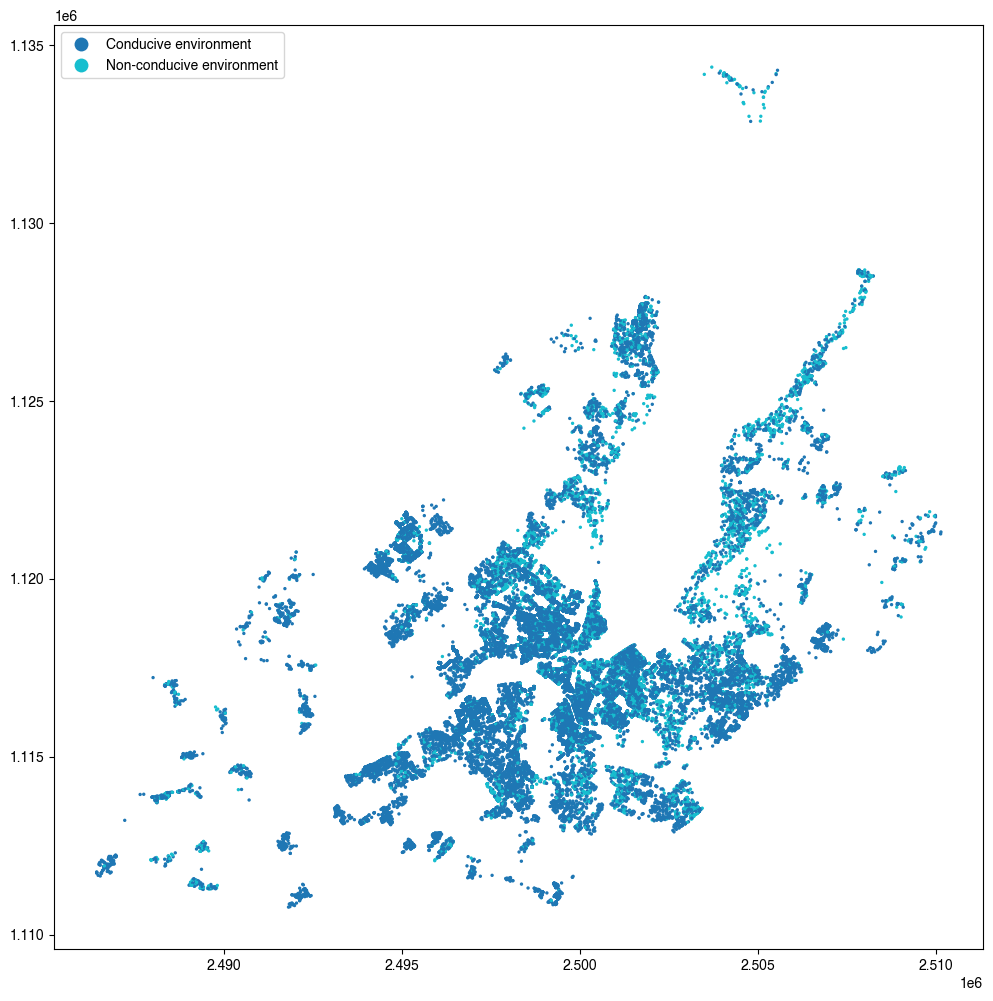

In [38]:
df_gee_5invit[df_gee_5invit.numeroinvitation_seq == 0].plot('status', markersize = 2, figsize = (12,12), legend = True)

In [39]:
times_by_numerodossier = df_gee.groupby('numerodossier').time.apply(list)

In [40]:
times_by_numerodossier = times_by_numerodossier.apply(sorted)

In [41]:
ntimes_by_numerodossier = times_by_numerodossier.apply(len)

In [42]:
ntimes_by_numerodossier[ntimes_by_numerodossier == 5]

numerodossier
1008191288    5
1008200014    5
1008204511    5
1008207217    5
1008229260    5
             ..
9009301780    5
9009303133    5
9009303497    5
9009305112    5
9009381253    5
Name: time, Length: 11202, dtype: int64

In [43]:
times_consecutive = times_by_numerodossier.apply(checkConsecutive)

NameError: name 'checkConsecutive' is not defined

In [ ]:
times_by_numerodossier = times_by_numerodossier.astype(str)

In [ ]:
times_by_numerodossier[times_by_numerodossier.str.contains('5, 6, 7, 8, 9')]

In [ ]:
times_by_numerodossier.value_counts().head(50).plot.bar(figsize = (20, 6))

In [ ]:
df_gee_5consecutive_invitations = df_gee[df_gee.numerodossier.isin(times_by_numerodossier[times_by_numerodossier.str.contains('5, 6, 7, 8, 9')].index)]

In [ ]:
df_gee_5consecutive_invitations = df_gee_5consecutive_invitations[df_gee_5consecutive_invitations.time.isin([5, 6, 7, 8, 9])]

In [ ]:
df_gee_5consecutive_invitations['time'] = df_gee_5consecutive_invitations['time'] - 5

In [ ]:
df_gee_5consecutive_invitations.groupby('deprivation_pca_q5').ciqmd.mean()

In [ ]:
df_gee_5consecutive_invitations = df_gee_5consecutive_invitations.sort_values('time').drop_duplicates(subset = ['numerodossier','biannual_year'])

In [ ]:
df_gee_5consecutive_invitations.groupby(['deprivation_pca_q5','status','time']).mammo.mean().unstack().round(2)

In [ ]:
df_gee_5consecutive_invitations.to_csv('../Data/mammo_gee_5consecutive_invit_dat.csv', index = False)

In [ ]:
def checkConsecutive(l):
    return sorted(l) == list(range(min(l), max(l)+1))

In [ ]:
fam = sm.families.Binomial()
ind = sm.cov_struct.Exchangeable()

In [ ]:
mod = smf.gee("mammo ~ deprivation_pca_q5 + time*C(status, Treatment(reference= 'Non-conducive environment'))", groups="numerodossier", data= df_gee_5consecutive_invitations, cov_struct=ind, family=fam)

In [ ]:
res = mod.fit()

In [ ]:
res.summary()

In [ ]:
vc

In [ ]:
model = smf.mixedlm("mammo ~ deprivation_pca_q5 + time*C(status, Treatment(reference='Non-conducive environment'))",
                    df_gee_5consecutive_invitations,
                    groups= "numerodossier").fit()
model.summary()

In [ ]:
model = smf.mixedlm("mammo ~ time*C(status, Treatment(reference= 'Non-conducive environment'))",
                    df_gee_5consecutive_invitations,
                    groups= "numerodossier").fit()
model.summary()

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"fill" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")


In [ ]:
# from statsmodels.stats.diagnostic import het_white

# het_white_res = het_white(model.resid, model.model.exog)

# labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

# for key, val in dict(zip(labels, het_white_res)).items():
#     print(key, val)

## TEST GEE

In [ ]:
URL = "http://static.lib.virginia.edu/statlab/materials/data/depression.csv"
dat = pd.read_csv(URL)

In [ ]:
dat

In [ ]:
# fig = plt.figure(figsize = (16, 9))

# ax = sns.boxplot(x = model.model.groups, y = model.resid)

# ax.set_title("Distribution of Residuals for Weight by Litter")
# ax.set_ylabel("Residuals")
# ax.set_xlabel("Individuals")

## Accessibility to screening centers

In [ ]:
fig,ax = plt.subplots(figsize = (12, 12))
communes.plot(color = 'lightgrey', ax = ax)
lake.plot(color = 'lightblue', ax = ax)
df_participation[df_participation.year_invit == 2010].plot('center_nearest', markersize = 6, scheme = 'naturalbreaks', cmap = 'BrBG', ax = ax, legend = True, legend_kwds = {'title':'Distance au centre le plus proche (m)'})
ax.set_title('Invitations 2010')

ax.set_axis_off()

In [ ]:
fig,ax = plt.subplots(figsize = (12, 12))
communes.plot(color = 'lightgrey', ax = ax)
lake.plot(color = 'lightblue', ax = ax)
df_participation[df_participation.year_invit == 2010].plot('center_density', markersize = 6, scheme = 'naturalbreaks', cmap = 'BrBG', ax = ax, legend = True, legend_kwds = {'title':'Densité de centres \ndans un rayon de 1200m'})
ax.set_title('Invitations 2010')
ax.set_axis_off()

### Adjusted Getis

In [ ]:
from pointpats import PointPattern, PoissonPointProcess
dfs_getis_adjusted = []
weights = []
for year in range(1999,2021,1):
    filename = '../Data/Processed data/Yearly datasets/GIRACS_participation_'+str(year)+'_wres'+'.feather'
    _df = pd.read_feather(filename)
    _df = pyspace.make_gdf(_df, 2056, 'e','n')
#     wq600_salt = pyspace.get_distanceBandW(_df,600)[1]
    wnn100 = lps.weights.KNN(cKDTree(get_points_array(_df.geometry)),100)

    _df[['resid0_norm','resid1_norm','resid2_norm','resid3_norm','resid4_norm']]=(_df[['resid0','resid1','resid2','resid3','resid4']]-_df[['resid0','resid1','resid2','resid3','resid4']].min())/(_df[['resid0','resid1','resid2','resid3','resid4']].max()-_df[['resid0','resid1','resid2','resid3','resid4']].min())
    _getis = pyspace.compute_getis(_df,'resid0_norm', wnn100, 999, p_001 = False)
    _getis = pyspace.compute_getis(_df,'resid1_norm', wnn100, 999, p_001 = False)
    _getis = pyspace.compute_getis(_df,'resid2_norm', wnn100, 999, p_001 = False)
    _getis = pyspace.compute_getis(_df,'resid3_norm', wnn100, 999, p_001 = False)
    _getis = pyspace.compute_getis(_df,'resid4_norm', wnn100, 999, p_001 = False)
    
    if year > 2011:
        _df[['resid5_norm','resid6_norm']]=(_df[['resid5','resid6']] - _df[['resid5','resid6']].min())/(_df[['resid5','resid6']].max()-_df[['resid5','resid6']].min())
        _getis = pyspace.compute_getis(_df,'resid5_norm', wnn100, 999, p_001 = False)
        _getis = pyspace.compute_getis(_df,'resid6_norm', wnn100, 999, p_001 = False)
    _getis = pyspace.compute_getis(_df,'mammo', wnn100, 999, p_001 = False)
    filename = '../Data/Processed data/Yearly datasets/GIRACS_participation_'+str(year)+'_wres_wgetis'+'.feather'
    _df.to_feather(filename)
    dfs_getis_adjusted.append(_df)

In [ ]:
reload(pyspace)

In [ ]:
# dfs_getis_adjusted = []
# for year in range(1999,2021,1):
#     filename = './Results/Processed data/Yearly datasets/GIRACS_participation_'+str(year)+'_wres_wgetis'+'.geojson'
#     _df = gpd.read_file(filename, driver = 'GeoJSON')
#     dfs_getis_adjusted.append(_df)

In [ ]:
year = 1999
for df in dfs_getis_adjusted:
#     pyspace.plotGetisMap(df,'mammo_G_cl', p_001 = False)
    fig, ax = pyspace.plotGetisMap(df,'resid0_norm_G_cl', p_001 = False)
    filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid0_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
    plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')

    pyspace.plotGetisMap(df,'resid1_norm_G_cl', p_001 = False)
    filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid1_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
    plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')

    pyspace.plotGetisMap(df,'resid2_norm_G_cl', p_001 = False)
    filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid2_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
    plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')

    pyspace.plotGetisMap(df,'resid3_norm_G_cl', p_001 = False)
    filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid3_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
    plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')

    pyspace.plotGetisMap(df,'resid4_norm_G_cl', p_001 = False)
    filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid4_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
    plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')

    if df.year_invit.unique() > 2011:
        pyspace.plotGetisMap(df,'resid5_norm_G_cl', p_001 = False)
        filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid5_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
        plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')

        pyspace.plotGetisMap(df,'resid6_norm_G_cl', p_001 = False)
        filename = "Getis Ord Gi* - {} - {}{}".format('_'.join('resid6_norm_G_cl'.split('_')[:-2]),'KNN100_'+str(year),'.png')
        plt.savefig(localautocorr_spatial_result_folder/filename, dpi = 200,bbox_inches = 'tight')
    year +=1

In [ ]:
cluster_result_folder = result_folder/'Cluster analyses/'
if not os.path.exists(cluster_result_folder):
    os.makedirs(cluster_result_folder)

In [ ]:
def BarplotCluster_Getis(df,xs,y,xtick_size,title_size, xlabel_size,ylabel_size,p_001 = False):
    sns.set_context("paper")
    x_label = 'Getis Gi* classes'
    f, ax = plt.subplots(2,4, figsize=(15, 15))
    plot_n = 0
#     ylim_max = df[y].max()*1.1
#     ylim_max = ylim_max.round(-1)
    colors = ['#2166ac','#67a9cf','#d1e5f0','#b2182b','#ef8a62','#fddbc7','#f7f7f7']
    if p_001:
        colors = ['#1c4978','#2166ac','#67a9cf','#d1e5f0','#991d2c','#b2182b','#ef8a62','#fddbc7','#f7f7f7']
    for i in range(2):
        for j in range(4):
            ylim_max = df[y].quantile(q = 0.99)
            plot_n += 1
            x_label = 'Getis Classes - {}'.format(xs[plot_n-1].split('_')[0])
            chart = sns.barplot(x=xs[plot_n-1], y=y,order = ['Cold Spot - p < 0.01','Cold Spot - p < 0.05','Cold Spot - p < 0.1','Hot Spot - p < 0.01','Hot Spot - p < 0.05','Hot Spot - p < 0.1','Not significant'],palette = colors, data=df,ax = ax[i,j])
            chart.set_xticklabels(chart.get_xticklabels(),size = xtick_size, rotation=45, horizontalalignment='right')
#             chart.set_title('{}'.format(xs[plot_n-1].split('_')[0]),size = title_size)
            chart.set_xlabel(x_label,size = xlabel_size)
            chart.set_ylabel(y,size = ylabel_size)
            chart.set_ylim([0, ylim_max])    

    plt.subplots_adjust(hspace = 0.4)
    filename = 'Bar plot - {} - {}.pdf'.format(xs[plot_n-1],y)
    chart.figure.savefig(cluster_result_folder/filename, dpi = 800, bbox_inches = 'tight')

In [ ]:
BarplotCluster_Getis(dfs_getis_adjusted[19],['mammo_G_cl','resid0_norm_G_cl','resid1_norm_G_cl','resid2_norm_G_cl','resid3_norm_G_cl','resid4_norm_G_cl','resid5_norm_G_cl','resid6_norm_G_cl'],"mammo",xtick_size = 10,title_size = 16,xlabel_size = 12,ylabel_size = 12,p_001 = False)

## Convex hulls and alpha shapes clusters

In [ ]:
from matplotlib import colors

In [ ]:
# from pysal.lib.cg import alpha_shape_auto
from libpysal.cg import alpha_shape_auto
from libpysal.weights.distance import get_points_array
from sklearn.cluster import dbscan
def clusters(db, r, m):
    '''
    Compute and visualize DBSCAN clusters    
    ...
    
    Arguments
    ---------
    db     : (Geo)DataFrame
             Table with at least columns `X` and `Y` for point coordinates
    r      : float
             Maximum radious to search for points within a cluster
    m      : int
             Minimum number of points in a cluster
    '''
    cos, lbls = dbscan(db[['e', 'n']], eps=r, min_samples=m)
    lbls = pd.Series(lbls, index=db.index)
    noise = db.loc[lbls==-1, ['e', 'n']]

    cs = db.loc[db.index.difference(noise.index), ['e', 'n']]
#     f, ax = plt.subplots(1, figsize=(6, 6))
    noise = db.loc[lbls==-1, ['e', 'n']]
    cores = db.iloc[cos, [0, 1]]
        
    colors = ['red', 'yellow', 'green', 'blue', 'orange', 'brown','black','cyan','pink','lightblue','lightgreen','magenta']

#     for id, c in cs.groupby(lbls[lbls!=-1]):
#         ax.scatter(c.x,c.y, c='red', linewidth=0)

#     ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
    return cs, lbls

In [ ]:
cold_spot = df[df['mammo_G_cl'].str.contains('Cold Spot')]

In [ ]:
cs_cold, lbls_cold = clusters(cold_spot,r = 100, m = 3)

In [ ]:
cs_cold['group'] = lbls_cold[lbls_cold!=-1]

In [ ]:
def plot_chulls(df,col,period,ashapes_cold,ashapes_hot,chulls_cold,chulls_hot):
    f, ax = plt.subplots(1, figsize=(15, 15))
    col_num = 'mammo'
    hmap = colors.ListedColormap(['#2166ac','#67a9cf','#d1e5f0','#b2182b','#ef8a62','#fddbc7','#f7f7f7'])
    communes.plot(ax = ax, label='Communes',alpha = 0.3,color=None,edgecolor='black',facecolor='grey')
    communes.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geom.centroid.coords[0], ha='center',size = 8),axis=1);
    lake.plot(ax = ax, label='Lake',alpha = 1,color = 'lightblue',edgecolor='None')
#     df.plot(col,cmap=hmap,markersize = 5,ax = ax, legend = True,categorical=True)
    ashapes_cold.crs = 'epsg:2056'
    ashapes_hot.crs = 'epsg:2056'
    y_mean_by_shape_cold = pd.DataFrame(gpd.sjoin(df,ashapes_cold, predicate = 'intersects').groupby(['group'])[col_num].mean().mul(100).round(1).astype(str)).reset_index()
    y_mean_by_shape_hot = pd.DataFrame(gpd.sjoin(df,ashapes_hot, predicate = 'intersects').groupby(['group'])[col_num].mean().mul(100).round(1).astype(str)).reset_index()
    ashapes_cold = pd.merge(y_mean_by_shape_cold,ashapes_cold, how = 'right',on = 'group')
    ashapes_hot = pd.merge(y_mean_by_shape_hot,ashapes_hot, how = 'right',on = 'group')
    ashapes_hot = gpd.GeoDataFrame(ashapes_hot, crs = 'epsg:2056', geometry = ashapes_hot['geometry'])
    ashapes_cold = gpd.GeoDataFrame(ashapes_cold, crs = 'epsg:2056', geometry = ashapes_cold['geometry'])
    ##plot
    ashapes_cold.plot(ax = ax,color = 'blue',alpha = 0.3,edgecolor='blue',linewidth=2)
#     chulls_cold.plot(ax = ax,color = 'blue',alpha = 0.4,edgecolor='None')
    ashapes_hot.plot(ax = ax,color = 'red',alpha = 0.3,edgecolor='red',linewidth=2)
#     chulls_hot.plot(ax = ax,color = 'red',alpha = 0.4,edgecolor='None')
    ashapes_cold.apply(lambda x: ax.annotate(text=x[col_num], xy=x.geometry.centroid.coords[0], ha='center',size = 6),axis=1);
    ashapes_hot.apply(lambda x: ax.annotate(text=x[col_num], xy=x.geometry.centroid.coords[0], ha='center',size = 6),axis=1);

    ax.set_facecolor('grey')
    ax.set_axis_off()
    filename = "Getis Clusters Chulls and Alpha Shapes - {} - {}.pdf".format(col.split('_')[0],period)
    plt.title(filename.split('.')[0])
    plt.savefig(cluster_result_folder/filename, dpi = 800,bbox_inches = 'tight')
    return plt.show()

In [ ]:
def make_gdf(df):
    geometry = [Point(xy) for xy in zip(df.e, df.n)]
    crs = 'epsg:2056'
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return gdf

In [ ]:
def make_chulls(df,col,period):
    cold_spot = df[df[col].str.contains('Cold Spot')]
    hot_spot = df[df[col].str.contains('Hot Spot')]
    ##
    cs_cold, lbls_cold = clusters(cold_spot,r = 200, m = 3)
    cs_hot, lbls_hot = clusters(hot_spot,r = 200, m = 3)
    ##
    cs_cold['group'] = lbls_cold[lbls_cold!=-1]
    cs_hot['group'] = lbls_hot[lbls_hot!=-1]
    ##
    cs_cold = make_gdf(cs_cold)
    cs_hot = make_gdf(cs_hot)
    ##
    cs_groups_cold = cs_cold.groupby('group')
    cs_groups_hot = cs_hot.groupby('group')
    ##Chulls
    chulls_cold = cs_groups_cold.geometry.apply(lambda group: group.unary_union.convex_hull)
    chulls_cold = gpd.GeoDataFrame(chulls_cold.reset_index())
    chulls_cold['Type'] = 'Cold'
    ##
    chulls_hot = cs_groups_hot.geometry.apply(lambda group: group.unary_union.convex_hull)
    chulls_hot = gpd.GeoDataFrame(chulls_hot.reset_index())
    chulls_hot['Type'] = 'Hot'

    ##Alpha Shapes
    ashapes_cold = cs_groups_cold.geometry.apply(lambda group: alpha_shape_auto(get_points_array(group)))
    ashapes_cold = gpd.GeoDataFrame(ashapes_cold.reset_index())
    ashapes_cold['Type'] = 'Cold'
    ##
    ashapes_hot = cs_groups_hot.geometry.apply(lambda group: alpha_shape_auto(get_points_array(group)))
    ashapes_hot = gpd.GeoDataFrame(ashapes_hot.reset_index())
    ashapes_hot['Type'] = 'Hot'
    ##
    chulls = pd.concat([chulls_hot,chulls_cold])
    ashapes = pd.concat([ashapes_hot,ashapes_cold])
    ##
    chulls['Period'] = period
    chulls['category'] = col
    chulls['Area_type'] = 'Convex hull'
    ashapes['Period'] = period
    ashapes['category'] = col
    ashapes['Area_type'] = 'Alpha shape'
    chulls.crs = 'epsg:2056'
    ashapes.crs = 'epsg:2056'
    shapes = pd.concat([chulls,ashapes])
    shapes['Area'] = shapes.geometry.area
    ##
#     file_chull = 'Chulls - {} - {}{}'.format(col.split('_')[0],period,'.geojson') 
#     file_ashapes = 'Alpha shapes - {} - {}{}'.format(col.split('_')[0],period,'.geojson') 
#     chulls.to_crs(epsg = 4326).to_file(cluster_result_folder/file_chull,driver = 'GeoJSON')
#     ashapes.to_crs(epsg = 4326).to_file(cluster_result_folder/file_ashapes,driver = 'GeoJSON')
    plot_chulls(df,col,period,ashapes_cold,ashapes_hot,chulls_cold,chulls_hot)
    return shapes

In [ ]:
df_chulls = []
for df in dfs_getis_adjusted:
    print(df.year_invit.unique()[0])
    try:
        _shapes = make_chulls(df,'resid0_norm_G_cl',str(df.year_invit.unique()[0]))
#     _shapes = make_chulls(df,'resid1_norm_G_cl',str(df.year_invit.unique()[0]))
#     _shapes = make_chulls(df,'resid2_norm_G_cl',str(df.year_invit.unique()[0]))
#     _shapes = make_chulls(df,'resid3_norm_G_cl',str(df.year_invit.unique()[0]))
#     _shapes = make_chulls(df,'resid4_norm_G_cl',str(df.year_invit.unique()[0]))
#     if df.year_invit.unique()[0] > 2011:
#         _shapes = make_chulls(df,'resid5_norm_G_cl',str(df.year_invit.unique()[0]))
#         _shapes = make_chulls(df,'resid6_norm_G_cl',str(df.year_invit.unique()[0]))
#     shapes = make_chulls(df,'mammo_G_cl',str(df.year_invit.unique()[0]))
        df_chulls.append(shapes)
    except:
        pass

In [ ]:
ashapes_charac = []
for df,_df_chull in zip(dfs_getis_adjusted,df_chulls):
    y_mean_by_shape = pd.DataFrame(gpd.sjoin(df,_df_chull[_df_chull.Area_type == 'Alpha shape'], predicate = 'intersects').groupby(['group','Type'])[['year_invit','income_ss','center_density','center_nearest','deprivation_pca','50-54','55-59','60-64','65-69','70-74','75-79','80-84']].mean()).reset_index()
    ashapes_charac.append(y_mean_by_shape)

## Classification of alpha shapes

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ashape_hcs = []
for ashape in ashapes_charac:
    ashape_cold = ashape[ashape.Type == 'Cold']
    X_cold = ashape_cold.iloc[:,4:].values
    ashape_hot = ashape[ashape.Type == 'Hot']
    X_hot = ashape_hot.iloc[:,4:].values
    hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
    try:
        y_hc_Cold =hc.fit_predict(X_cold)
        y_hc_Hot =hc.fit_predict(X_hot)

        ashape_cold = ashape_cold.assign(gp_hc = y_hc_Cold)
        ashape_hot = ashape_hot.assign(gp_hc = y_hc_Hot)
        ashape_hc = pd.concat([ashape_hot,ashape_cold])
        ashape_hcs.append(ashape_hc)
    except:
        pass

In [ ]:
ashapes_charac_hc = []
for ashape_hc,_df_chull in zip(ashape_hcs,df_chulls):
    ashape_hc = pd.merge(ashape_hc,_df_chull[_df_chull.Area_type == 'Alpha shape'][['group','Type','geometry']],on = ['group','Type'])
    ashape_hc = gpd.GeoDataFrame(ashape_hc,geometry = ashape_hc['geometry'])
    ashapes_charac_hc.append(ashape_hc)

In [ ]:
def plot_hc_ashapes(clusters,df,col,period):
    f, ax = plt.subplots(1, figsize=(15, 15))
    hmap = colors.ListedColormap(['#2166ac','#67a9cf','#d1e5f0','#b2182b','#ef8a62','#fddbc7','#f7f7f7'])
    communes.plot(ax = ax, label='Communes',alpha = 0.3,color=None,edgecolor='black',facecolor='grey')
    communes.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geom.centroid.coords[0], ha='center',size = 7),axis=1);
    
    lake.plot(ax = ax, label='Lake',alpha = 1,color = 'lightblue',edgecolor='None')
#     df.plot(col,cmap=hmap,markersize = 3,alpha = 0.4,ax = ax,categorical=True)
    ashapes_hc_cold = clusters[clusters.Type == 'Cold']
    ashapes_hc_hot = clusters[clusters.Type == 'Hot']
    hmap = colors.ListedColormap(['#a6cee3','#b2df8a','#fb9a99','#bcbddc'])
    ##plot
    ashapes_hc_cold.plot('gp_hc',cmap = hmap,ax = ax,alpha = 0.6,legend = True,categorical = True,edgecolor='blue',linewidth=1.4)
#     chulls_cold.plot(ax = ax,color = 'blue',alpha = 0.4,edgecolor='None')
#     hmap = colors.ListedColormap(['#fdbf6f','#cab2d6', '#ffffb3','#f03b20'])
    ashapes_hc_hot.plot('gp_hc',cmap = hmap,ax = ax,alpha = 0.6,categorical = True,edgecolor='red',linewidth=1.4)
#     chulls_hot.plot(ax = ax,color = 'red',alpha = 0.4,edgecolor='None')
#     ashapes_hc_cold.apply(lambda x: ax.annotate(text=x['desc'], xy=x.geometry.centroid.coords[0], ha='center',size = 8),axis=1);
#     ashapes_hc_hot.apply(lambda x: ax.annotate(text=x['desc'], xy=x.geometry.centroid.coords[0], ha='center',size = 8),axis=1);

    ax.set_facecolor('grey')
    ax.set_axis_off()
    filename = "Getis Clusters Alpha Shapes with HC - {} - {}.pdf".format('mammo',period)
    plt.title(filename.split('.')[0])
    plt.savefig(cluster_result_folder/filename, dpi = 800,bbox_inches = 'tight')
    return plt.show()

In [ ]:
def color_func(a,b,c,d,e,f):
    desc = str(a)
    if c > 10000:
        desc += ': Urbain,'
    else:
        desc += ': Périurbain,'
    if d > 0.75:
        desc += 'SES bas,'
    else:
        desc += 'SES haut,'
    if e < 2500:
        desc += 'accès haut'
    else:
        desc += 'accès bas'
    return desc
for ashape_charac_hc,df in zip(ashapes_charac_hc,dfs_getis_adjusted):
    ashape_charac_hc['desc'] = ashape_charac_hc.apply(lambda x: color_func(a = x['gp_hc'], b = x['Type'],c = x['deprivation_pca'],d = x['center_nearest'],e = x['50-54'],f = x['55-59']), axis=1)
    plot_hc_ashapes(ashape_charac_hc,df,'mammo_G_cl',ashape_charac_hc.year_invit.unique()[0])

In [ ]:
ashapes_charac_hc[0].deprivation_pca.max()

In [ ]:
ashapes_charac_hc[19].groupby(['Type','gp_hc'])[['income_ss','deprivation_pca','center_nearest']].mean().round(1)

In [ ]:
a = df_participation[df_participation.rappel == 1].groupby('year_invit').size()

In [ ]:
b = df_participation[(df_participation.rappel == 1)&(df_participation.mammo == 1)].groupby('year_invit').size()

## Proximity analyses

In [ ]:
proximity_result_folder = result_folder/'Proximity analyses'
if not os.path.exists(proximity_result_folder):
    os.makedirs(proximity_result_folder)

In [ ]:
gdf_centre = gpd.read_file(data_folder/'BC_ScreeningCenters.geojson')
df_participation = gpd.read_file('../Data/Processed data/20210121_GIRACS_all.geojson',driver = 'GeoJSON')

In [ ]:
gdf_centre = gdf_centre.to_crs('epsg:2056')

In [ ]:
def plotProximityMap(db,outlets,y):
    """
    Visualize results on a map
    ...
    Arguments
    -------------
    db : GeodataFrame
    y : Series"""
    f, ax = plt.subplots(1, figsize=(15, 15))
#     hmap = colors.ListedColormap([ '#f7f7f7', '#b2182b', '#d1e5f0', '#2166ac', '#ef8a62'])
    communes.plot(ax = ax, label='Communes',alpha = 0.3,color=None,edgecolor='black',facecolor='grey')
    communes.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geom.centroid.coords[0], ha='center',size = 8),axis=1);
    lake.plot(ax = ax, label='Lake',alpha = 1,color = 'lightblue')
    db.plot(y,cmap='Reds',markersize = 5,ax = ax, legend = True, scheme = 'naturalbreaks')
    ax.set_axis_off()
    ax.set_facecolor('grey')
    outlets.plot(ax = ax,markersize = 3,alpha = 0.2, label='Outlets',color = 'green', legend = True)

    filename = "Proximity analysis - {}{}".format(y,'.pdf')
    plt.title(filename.split('.')[0])
    plt.savefig(proximity_result_folder/filename, dpi = 800,bbox_inches = 'tight')
    return plt.show()

In [ ]:
prox_vars = ['center_density','center_nearest']
for var in prox_vars:
    plotProximityMap(df_participation,gdf_centre,var)

## 2. Determinants of first participation

![caption](Data/fig1.png)

    
 

**Source : https://bmccancer.biomedcentral.com/articles/10.1186/s12885-018-4125-z**
- Known determinants of mammography screening participation:
    - Age  (groupeage)
    - Civil status (etatcivil)
    - Proximity and density of BC screening facility (center_density & center_nearest)
    - Area-level deprivation

- Incomplete variables (many variables have only a value when the woman participated in the mammography):
    - mammoanterieure
    - Known risk factors (atf)

In [ ]:
df_1st = df_participation[df_participation.numeroinvitation_seq == 1]

In [ ]:
df_1st['no_mammo'] = abs(1- df_1st['mammo'])

In [ ]:
df_1st.to_csv(result_folder/'df_1st.csv')

In [ ]:
c = df_1st.groupby(['year_invit','mammo'])['mammo'].count()
test = (c / c.groupby(level=[0]).transform("sum")).unstack('mammo').fillna(0)
yerr = ((test[1]*(1-test[1]))/(c.unstack('mammo')[0]+c.unstack('mammo')[1]))**(0.5)
test *=100
yerr *= 100

f,ax = plt.subplots(figsize = (10,10))
test[1].plot(kind = 'barh',xerr = yerr,color = ['red'],ax = ax)
ax.set_title('Taux de participation à la première invitation au dépistage du cancer du sein selon l\'année d\'invitation')
ax.set_ylabel('Année invitation')
ax.set_xlabel('Taux de participation')
plt.savefig(result_folder/'tx_participation_yearinvit.png',bbox_inches='tight', transparent=True,dpi = 400)

We see that the crude participation rate has increased a lot over years...it could suggest that communication campaigns about BC screening have worked and the screening got traction overtime.

It also means that the period 1999-2012 is hardly comparable with 2013-2018 and I would suggest to separate them. It would also benefit analyses by reducing computation time.

In [ ]:
df_1st_1318 = df_1st[df_1st.year_invit > 2012]

In [ ]:
df_1st_1318['age_cat'] = pd.factorize(df_1st_1318['groupeage'], sort=True)[0] + 1 
df_1st_1318['etatcivil_cat'] = pd.factorize(df_1st_1318['etatcivil'], sort=True)[0] + 1 

In [ ]:
df_1st_1318.to_file(result_folder/'GIRACS_1stparticipation_1318.shp')

## XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df_1st.name = '1st participation'
y = 'mammo'
X_eq0 = ['income_ss','center_nearest','deprivation_pca','ptot','30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90-94', 'biannual_year']
# X_eq1 = ['LST','NDVI','pm25','no2','SES_cat','noise_car_night','B20BTOT','B20BTOT_lag8']
Xs = [X_eq0]

In [ ]:
X_coords = df_1st[X_eq0 + ['e','n']]
# X_coords = np.hstack([X,coords])
y = df_1st['mammo']

In [ ]:
names = ['income_ss','center_nearest','deprivation_pca','ptot','30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90-94', 'biannual_year','x-coord','y-coord']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [ ]:
%%time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

# Choose hyperparameter domain to search over
space = {
        'max_depth':hp.choice('max_depth', np.arange(1, 30, 1, dtype=int)),
        'colsample_bytree':hp.quniform('colsample_bytree', 0.3, 1.01, 0.05),
        'min_child_weight':hp.choice('min_child_weight', np.arange(1, 30, 1, dtype=int)),
        'subsample':        hp.quniform('subsample', 0.3, 1.01, 0.05),
        'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 1.01, 0.05)),
        'gamma': hp.quniform('gamma', 0.1, 5, 0.05),
    
        'objective':'reg:squarederror',
        'eval_metric': 'rmse',
    }

def score(params, n_folds=5):
    
    #Cross-validation
    d_train = xgboost.DMatrix(X_coords,y)
    
    cv_results = xgboost.cv(params, d_train, nfold = n_folds, num_boost_round=500,
                        early_stopping_rounds = 10, metrics = 'rmse', seed = 0)
    
    loss = min(cv_results['test-rmse-mean'])
    
    return loss

def optimize(trials, space, n_evals):
    
    best = fmin(score, space, algo=tpe.suggest, max_evals=n_evals,trials=trials,
                rstate=np.random.default_rng(333))#Add seed to fmin function
    return best

In [ ]:
trials = Trials()
best_params = optimize(trials, space, n_evals = 1000)

# Return the best parameters
best_params = space_eval(space, best_params)

best_params

In [ ]:
import pickle

In [ ]:
with open('trials.pkl','wb') as f:
    pickle.dump(trials, f)

with open('best_params.pkl','wb') as f:
    pickle.dump(best_params, f)

In [ ]:
pd.DataFrame.from_dict(trials.results).loss.plot(ylim = (0,10))

In [ ]:
sns.regplot(x = pd.DataFrame.from_dict(trials.results).index, y = pd.DataFrame.from_dict(trials.results).loss)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)
d_all = xgboost.DMatrix(X_coords,label=y)

final_model = xgboost.train(best_params,  d_train, num_boost_round=500, evals = [(d_train,"train"),(d_test, "test")], 
                      verbose_eval=False, early_stopping_rounds=10)

y_pred_t = final_model.predict(d_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_t)))
print("R2:",r2_score(y_test,y_pred_t))

In [ ]:
data_test = xgboost.DMatrix(X_test,y_test)
data = xgboost.DMatrix(X_train,y_train)
final_model = xgboost.train(best_params, data, num_boost_round=5000, verbose_eval=False,
                            evals=[(data_test, "Test")],early_stopping_rounds=10)


data_all = xgboost.DMatrix(X_coords)
y_pred = final_model.predict(data_all)
print('RMSE:',np.sqrt(mean_squared_error(y, y_pred)))
print('R2: ',r2_score(y, y_pred))

In [ ]:
# Init classifier
xgb_cl = xgboost.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_cl = xgboost.XGBClassifier(objective="binary:logistic")

In [ ]:
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

In [ ]:
# Fit
_ = grid_cv.fit(X_train, y_train)

In [ ]:
final_cl = xgboost.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic")

In [ ]:
_ = final_cl.fit(X_train, y_train)

preds = final_cl.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

## Shap values - Interpretation

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)


In [ ]:
explainer_shap = shap.TreeExplainer(xgb_cl)
shap_values = explainer_shap(X_coords)

shap_interaction_values = shap.TreeExplainer(xgb_cl).shap_interaction_values(X_coords)

In [ ]:
shap_ins = []

In [ ]:
shap.summary_plot(shap_values,feature_names = names)

In [ ]:
plt.figure(figsize=(4, 4), dpi=160)

shap.summary_plot(shap_interaction_values, X_coords, max_display=16, 
                  feature_names = names,
                  plot_type="compact_dot")

In [ ]:
f1_est = shap_values[:,0].values
f2_est = shap_values[:,1].values
f3_est = shap_values[:,2].values

In [ ]:
plt.figure(figsize=(10, 8), dpi=300)

plt.subplot(221)
# plt.plot(shap_values[:,0].data,shap_values[:,0].data*b1, label=r"True ($\beta_1=2$)",color="red")
plt.scatter(shap_values[:,0].data,f1_est, label="XGBoost",s=8)

plt.xlabel("X1",fontsize=13)
plt.ylabel("SHAP value \n(impact on model output)",fontsize=13)
# plt.ylim(-,8)
plt.legend()

plt.subplot(222)
# plt.plot(shap_values[:,1].data,shap_values[:,1].data*b2, label=r"True ($\beta_2=1$)",color="red")
plt.scatter(shap_values[:,1].data,f2_est, label="XGBoost",s=8)


plt.xlabel("X2",fontsize=13)
# plt.ylim(-8,8)
plt.legend()

plt.subplot(223)
# plt.plot(shap_values[:,1].data,shap_values[:,1].data*b2, label=r"True ($\beta_2=1$)",color="red")
plt.scatter(shap_values[:,3].data,f3_est, label="XGBoost",s=8)


plt.xlabel("X2",fontsize=13)
# plt.ylim(-8,8)
plt.legend()

plt.tight_layout()

In [ ]:
len(X_eq0)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15, 8))

for j in range(len(X_eq0)):
    ax = ax.ravel()
    df_1st.plot(ax=ax[j], markersize = 3,column = shap_values.values[:,j],legend=True,
             vmin=-0.8,vmax=0.8,cmap=shap.plots.colors.red_white_blue, legend_kwds ={'shrink':0.3})
    
    ax[j].set_title("SHAP for\n" + str(X_eq0[j]),fontsize=10)

In [ ]:
fig, ax = plt.subplots(dpi=300)

df_1st.plot(ax=ax,column = shap_values.values[:,-1] + shap_values.values[:,-2], markersize=3,
             legend=True,vmin=-0.6,vmax=0.6,figsize=(15,8),
                cmap=shap.plots.colors.red_white_blue)


plt.title("Location Effect on Cluster persistence\n(SHAP values of geographic coordinates)\n",fontsize=8)

plt.axis('off')

In [ ]:
xgboost.plot_importance(final_model)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [ ]:
xgboost.plot_importance(final_model, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()

In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_coords)

In [ ]:
from tqdm import tqdm

shap_bootstrap_list = []

def boostrap_shap(y_pred):
    n = y.shape[0]
    err = y - y_pred
    
    for i in tqdm(range(3000)):
        
        random_sample_index = np.random.choice(np.arange(n), size=n, replace=True)
        
        y_sample = y_pred + err[random_sample_index]
        
        sample_data = xgboost.DMatrix(X_coords,y_sample)
        
        sample_model = xgboost.train(best_params, sample_data, num_boost_round=500,verbose_eval=False,
                            evals=[(data_test, "Test")],early_stopping_rounds=10)
    
        explainer_shap = shap.Explainer(sample_model)
        shap_values = explainer_shap(X_coords)

        shap_bootstrap_list.append(shap_values.values)
        
    return np.array(shap_bootstrap_list)

In [ ]:
y_pred

In [ ]:
y_pred

In [ ]:
%%time
np.random.seed(333)

shap_bootstrap_list = boostrap_shap(y_pred)

In [ ]:
with open('shap_bootstrap_list.pkl','wb') as f:
    pickle.dump(shap_bootstrap_list, f)

In [ ]:
l_shap_global = np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0) - \
                np.percentile(np.abs(shap_bootstrap_list).mean(axis=1),axis=0, q=2.5)
                
u_shap_global = np.percentile(np.abs(shap_bootstrap_list).mean(axis=1),axis=0, q=97.5) - \
                np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0)

df_mean_shap = pd.DataFrame(np.vstack([np.array(X_coords.columns), 
                        np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0),
                        l_shap_global, u_shap_global,
                        np.percentile(np.abs(shap_bootstrap_list).mean(axis=1),axis=0, q=2.5),
                        np.percentile(np.abs(shap_bootstrap_list).mean(axis=1),axis=0, q=97.5) 
                                      ]).T,
                            columns=['Feature','SHAP', 'SHAP_err_l',
                                     'SHAP_err_u','SHAP_l','SHAP_u'])

In [ ]:
df_mean_shap = df_mean_shap.sort_values(by="SHAP",ascending=True)

df_mean_shap["SHAP"] = df_mean_shap["SHAP"].astype("float")
df_mean_shap["SHAP_err_u"] = df_mean_shap["SHAP_err_u"].astype("float")
df_mean_shap["SHAP_err_l"] = df_mean_shap["SHAP_err_l"].astype("float")

In [ ]:
shap.summary_plot(shap_values, X_coords, plot_type="bar")

In [ ]:
def plot(ax,term=0):
    
    order = np.argsort(X_coords.values[:,term])

    ax.fill_between(X_coords.values[:,term][order], l_95[:,term][order], 
                     u_95[:,term][order],color='lightblue',alpha=0.6)
    
    ax.scatter(X_coords.values[:,term][order], shap_bootstrap_list.mean(axis=0)[:,term][order],
                s=10,color='black')
    
    ax.axhline(0,color='r', linestyle='--',)
    ax.set_xlabel(names[term],fontsize=13)
    #ax.set_ylim(-2.5,2.5)
    ax.set_ylabel("SHAP value",fontsize=13)
    plt.tight_layout()

In [ ]:
shap.dependence_plot('income_ss', shap_values, X_coords, display_features=X_coords)

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_coords, display_features=X_coords)

In [ ]:
#Compute the 95% confidence interval
l_95 = np.percentile(shap_bootstrap_list,axis=0,q=2.5)
u_95 = np.percentile(shap_bootstrap_list,axis=0,q=97.5)

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(12,8),dpi=300)
ax = ax.ravel()
index = 0
for j in [2, 7, 0, 8, 3, 5, 1, 4, 6 ]:
    plot(ax=ax[index],term=j)
    index += 1

# Join count

## Global

In [ ]:
df_1st_1318 = gpd.GeoDataFrame(df_1st_1318,geometry = df_1st_1318['geometry'])

In [ ]:
import libpysal as lps
def get_KNNW(df,nn,lon,lat):
    """One liner to get fast knn weights calculation.
    `get_points_array` function: This function extracts the coordinates of all vertices 
    for a variety of geometry packages in Python and returns a `numpy` array.
    
    Then, we must build the `KDTree` using `scipy`. For nearly any application, the `cKDTree` will be faster. 
    `KDTree` is an implementation of the datastructure in pure Python, whereas the `cKDTree` is 
    an implementation in Cython."""
    if not df.empty:
        nodes = lps.cg.KDTree(np.array(df[[lon,lat]]))
        weight = lps.weights.KNN(nodes,k = nn)
    #     weight.transform = transform
        return df,weight
    else:
        return None,None
df_knn8, weight = get_KNNW(df_1st_1318,8,'E_shifted','N_shifted')

In [ ]:
def JoinCount(db,col,knn,w):
    xlabel = "Binary Join Count - {} - {}".format(col,str(knn))
    y = db[col]
    np.random.seed(12345)
    w.transform = 'b'
    jc = esda.Join_Counts(y,w)
    print(col,knn,jc.p_sim_bb,jc.p_sim_bw,jc.mean_bb,jc.mean_bw,sep = ',')
    ##
    sns.kdeplot(jc.sim_bb, shade=True)
    plt.vlines(jc.bb, 0, 0.00015, color='r')
    plt.vlines(jc.mean_bb, 0,0.00015)
    plt.xlabel('BB Counts')
    plt.title('Join-Counts')
    filename = xlabel +'.pdf'
#     plt.savefig(globalautocorr_spatial_result_folder/filename,dpi = 800, bbox_inches = 'tight')
    return jc, plt.show()

In [ ]:
print('Variable','KNN','p_sim_bb','p_sim_bw','mean_bb','mean_bw',sep = ',')
jc_knn8 = JoinCount(df_knn8,'mammo',8,weight)

## Local

In [ ]:
df_1st_1318_JC = pd.read_csv(result_folder/'df_1st1318_JC.csv')

In [ ]:
def make_gdf(df,x,y):
    geometry = [Point(xy) for xy in zip(df[x], df[y])]
    crs = {'init': 'epsg:2056'}
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return gdf
df_1st_1318_JC = make_gdf(df_1st_1318_JC,'E_shifted','N_shifted')

In [ ]:
df_1st_1318_JC.loc[df_1st_1318_JC.PP_VAL <= 0.001,'color_JC'] = '#a50f15'
df_1st_1318_JC.loc[(df_1st_1318_JC.PP_VAL > 0.001)&(df_1st_1318_JC.PP_VAL < 0.01),'color_JC'] = '#fc9272'
df_1st_1318_JC.loc[(df_1st_1318_JC.PP_VAL >= 0.01)&(df_1st_1318_JC.PP_VAL < 0.05),'color_JC'] = '#fee5d9'
df_1st_1318_JC.loc[(df_1st_1318_JC.PP_VAL >= 0.05),'color_JC'] = '#d9d9d9'
df_1st_1318_JC.loc[(df_1st_1318_JC.PP_VAL.isnull()),'color_JC'] = '#bababa'

In [ ]:
y = 'color_JC'
#fee5d9
#fcbba1
#fc9272
#fb6a4a
#de2d26
#a50f15

ns = df_1st_1318_JC[df_1st_1318_JC[y] == '#d9d9d9']
_001 = df_1st_1318_JC[df_1st_1318_JC[y] == '#a50f15']
_01 = df_1st_1318_JC[df_1st_1318_JC[y] == '#fc9272']
_05 = df_1st_1318_JC[df_1st_1318_JC[y] == '#fee5d9']
_nan = df_1st_1318_JC[df_1st_1318_JC[y] == '#bababa']

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 15))

ns.plot(color = ns.color_JC,markersize = 2,ax = ax, legend = True,categorical=True,zorder = 1)
_nan.plot(color = _nan.color_JC,markersize = 2,ax = ax, legend = True,categorical=True,zorder = 2)
_05.plot(color = _05.color_JC,markersize = 2,ax = ax, legend = True,categorical=True,zorder = 3)
_01.plot(color = _01.color_JC,markersize = 2,ax = ax, legend = True,categorical=True,zorder = 4)
_001.plot(color = _001.color_JC,markersize = 2,ax = ax, legend = True,categorical=True,zorder = 5)
gdf_centre.plot(ax = ax,markersize = 10, color = 'black',marker = 'x',edgecolor='black',zorder = 6)
ax.set_title('Spatial distribution of the mammography screening participation rate in quintiles in Geneva, Switzerland.')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite,crs = 'EPSG:2056')
ax.set_axis_off()
# add scale bar
scalebar = ScaleBar(1, units="m", location="lower right")
ax.add_artist(scalebar)
ax.set_axis_off()
x, y, arrow_length = 0.9, 0.15, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
plt.savefig(result_folder/'JC_no_mammo.png',dpi = 800)